<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/8_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1> /dev/null

In [2]:
import whit_phys_util as buc
from sympy import *
import matplotlib. pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [3]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Repository exists at this location. Pulling changes from GitHub.


In [4]:
var('k r m l u')
m = 1
k = 1
l = 1

# a)

In [5]:
F = -k/r**(5/2)
U = -F.integrate(r)
Ueff = U + (l**2)/(2*m*r**2)

In [6]:
Ueff.simplify()

r**(-2.0)/2 - 0.666666666666667*r**(-1.5)

In [7]:
def minimize(U):
  dUdr = U.diff(r)
  r0 = solve(dUdr,r)
  return r0

In [8]:
r0 = minimize(Ueff)[0]
r0

1.00000000000000

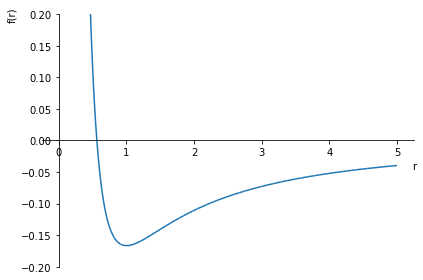

In [9]:
fig1 = plot(Ueff, (r, 0,5*r0), ylim=(-.2,.2))

# b)

In [11]:
E = -0.1

In [ ]:
Ueff

In [13]:
rmin = solve(Ueff-E,r)[0]
rmin 

0.667079279988211

# c)

In [20]:
phi = [0,7*np.pi]
phirange = np.linspace(0,phi[-1],10000)

In [21]:
F = -k*u**(5/2)

In [22]:
def solver(phi, q):
  [u, uprime] = q
  function = [uprime, -u + u**.5]
  return function

In [23]:
y0 = [1/rmin, 0]

solution = solve_ivp(solver, phi, y0, t_eval=phirange)
phi = solution.t
r = 1/solution.y[0]

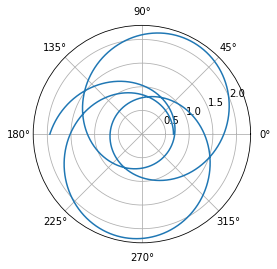

In [25]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.plot(phi, r);

In [ ]:
# this does not appear to be closed